# Fraud detection with Machine Learning model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [2]:
card_info = pd.read_csv('data/cc_info.csv')
transaction_info = pd.read_csv('data/transactions.csv')

In [3]:
card_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [4]:
transaction_info.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


Check for missing values

In [5]:
card_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [6]:
transaction_info.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

Let's merge the two tables on the "credit_card" column.

In [7]:
credit_card = transaction_info.merge(card_info, on='credit_card')

credit_card.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [8]:
credit_card.shape

(294588, 9)

In [9]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


### Exploring the data with visualization

Let's explore the dollar amount of transactions.

In [10]:
credit_card['transaction_dollar_amount'].describe()

count    294588.000000
mean         86.008036
std         124.655954
min           0.010000
25%          29.970000
50%          58.470000
75%         100.400000
max         999.970000
Name: transaction_dollar_amount, dtype: float64

Text(0.5, 0, 'Transaction Dollar Amount')

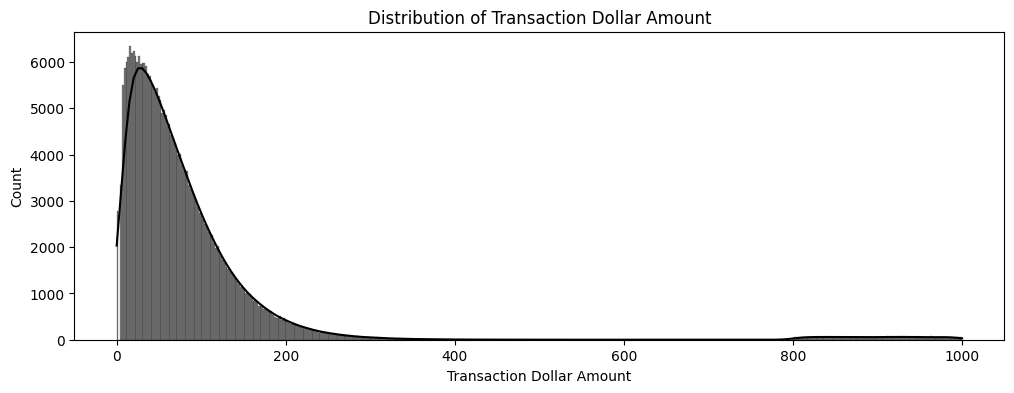

In [11]:
plt.figure(figsize=(12, 4))
sns.histplot(credit_card['transaction_dollar_amount'], kde=True, color='black')
plt.title('Distribution of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')

Text(0.5, 1.0, 'Number of Transactions by Day')

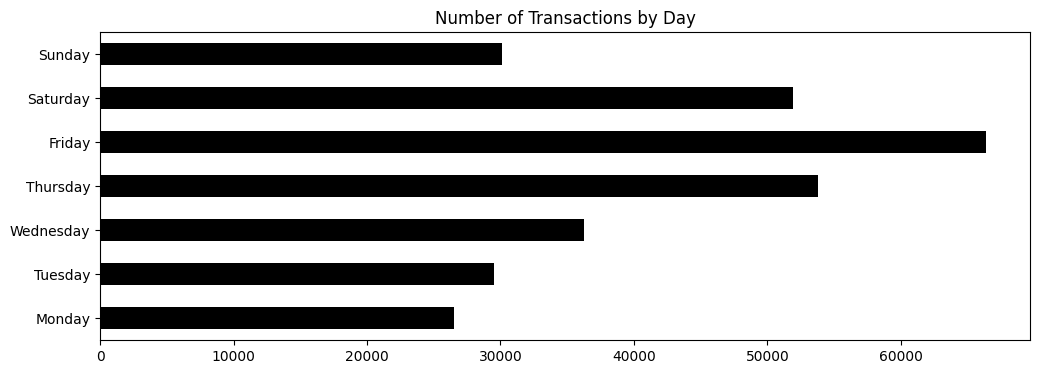

In [63]:
credit_card['date'] = pd.to_datetime(credit_card['date'])


credit_card['day_name'] = credit_card['date'].dt.day_name()
transaction_counts = credit_card.groupby('day_name')['transaction_dollar_amount'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_counts = transaction_counts.reindex(days_order)

transaction_counts.plot(kind='barh', figsize=(12, 4), color='black', ylabel='')
plt.title('Number of Transactions by Day')

Text(0.5, 0, 'Transaction Dollar Amount')

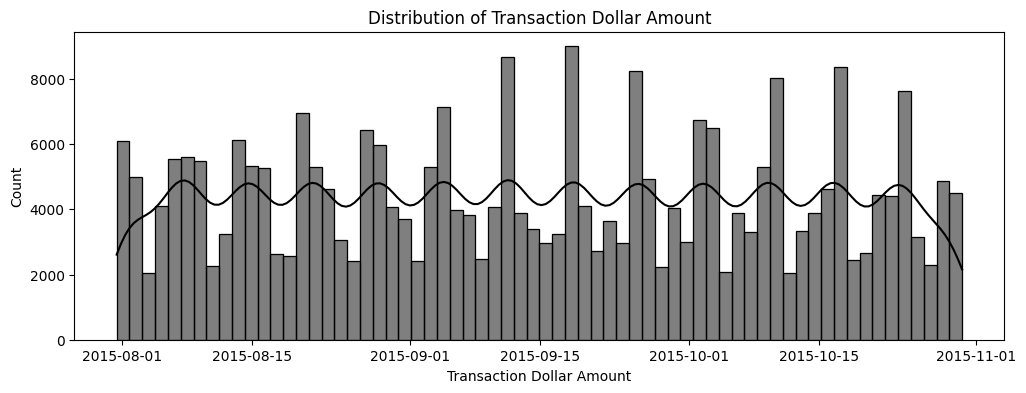

In [13]:
plt.figure(figsize=(12, 4))
sns.histplot(credit_card['date'], kde=True, color='black')
plt.title('Distribution of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')

Text(0.5, 1.0, 'Number of Transactions by State')

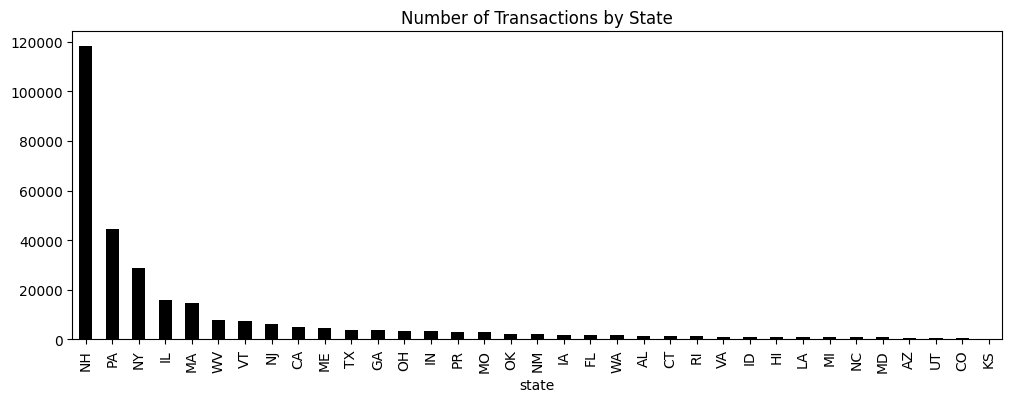

In [64]:
credit_card['state'].value_counts().plot(kind='bar', figsize=(12, 4), color='black')
plt.title('Number of Transactions by State')

In [15]:
credit_card['credit_card_limit'].describe()

count    294588.000000
mean      15502.053716
std        7956.291556
min        2000.000000
25%       10000.000000
50%       15000.000000
75%       20000.000000
max       55000.000000
Name: credit_card_limit, dtype: float64

Text(0.5, 1.0, 'Credit Card limit distribution')

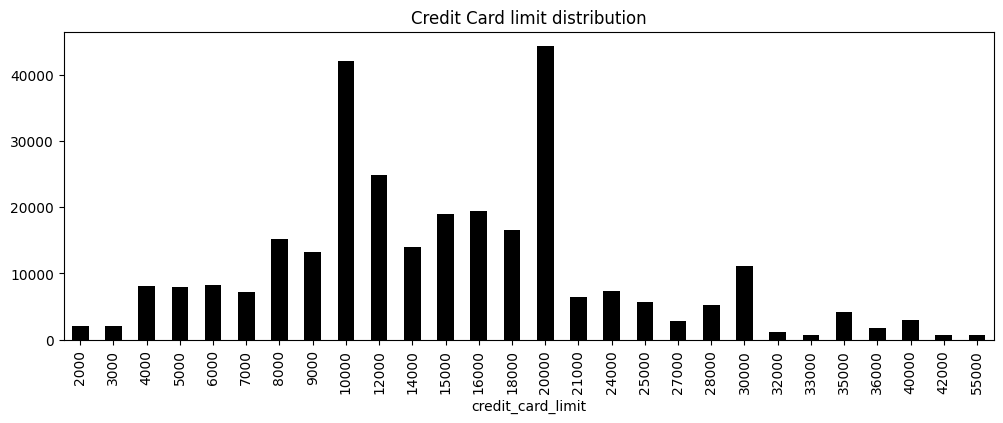

In [70]:
credit_card['credit_card_limit'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(12, 4), color='black')
plt.title('Credit Card limit distribution')

In [17]:
credit_card.select_dtypes(include=['datetime', 'float', 'int']).corr()

,credit_card,date,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit
credit_card,1.000000,0.000360,0.009553,-0.014723,-0.026233,0.023004,0.011901
date,0.000360,1.000000,0.001426,0.001714,0.000461,0.001589,-0.000578
transaction_dollar_amount,0.009553,0.001426,1.000000,0.005647,-0.003378,-0.005318,0.188185
Long,-0.014723,0.001714,0.005647,1.000000,-0.090308,-0.499151,0.001861
Lat,-0.026233,0.000461,-0.003378,-0.090308,1.000000,-0.309885,-0.020188
zipcode,0.023004,0.001589,-0.005318,-0.499151,-0.309885,1.000000,0.011202
credit_card_limit,0.011901,-0.000578,0.188185,0.001861,-0.020188,0.011202,1.000000


<Axes: >

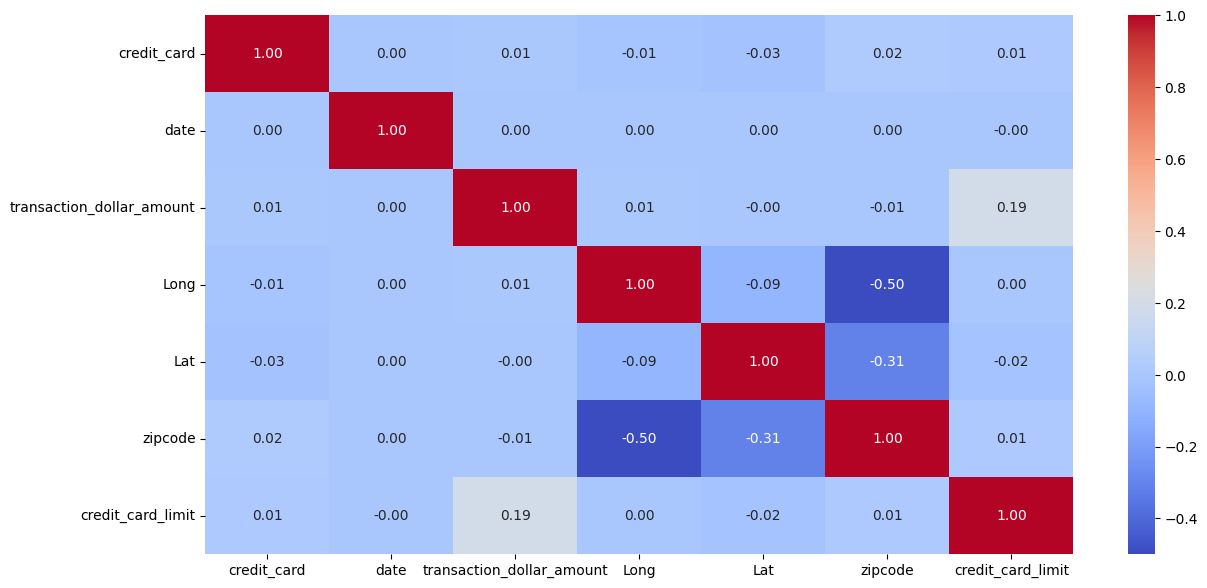

In [18]:
plt.figure(figsize=(14, 7))
sns.heatmap(credit_card.select_dtypes(include=['datetime', 'float', 'int']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
